In [16]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import calendar


In [17]:
data=pd.read_csv(r"C:\Users\Shyam Krishna. M\Downloads\Fraud Analytics Dataset1.csv")

In [18]:
data

,txn_id,dt_txn_comp,txn_comp_time,txn_type,txn_subtype,initiating_channel_id,txn_status,error_code,payer_psp,payee_psp,...,custref_transaction_ref,cred_type,cred_subtype,payer_app_id,payee_app_id,initiation_mode,dt_time_txn_compl,time_of_day,@dropdown,@dropdown.1
0,436,2023-08-11,12:00:00 AM,Refund,Product Refund,4,Successful,NaN,Amazon Pay,BharatPe (for UPI and QR code payments),...,Reference 324,Debit Card,Prepaid Debit Card,BHIM Union Bank UPI App,AmazonPay,18,2023-08-11 0:00,Night,NaN,NaN
1,665,2021-10-17,12:00:00 AM,Payment,Peer-to-Peer (P2P),16,Successful,NaN,ICICI iMobile,Square (for international transactions),...,Reference 550,Overdraft,Business Overdraft,ESAF,BHIM Union Bank UPI App,18,2021-10-17 0:00,Night,NaN,NaN
2,726,2019-11-16,12:00:00 AM,Withdrawal,ATM Withdrawal,3,Successful,NaN,Axis Pay,PhonePe for Merchants,...,Reference 611,Auto Loan,Used Car Loan,ICICI iMobile,BHIM Indus Pay,16,2019-11-16 0:00,Night,NaN,NaN
3,842,2023-09-05,12:00:00 AM,Transfer,Inter-bank Transfer,0,Successful,NaN,MobiKwik,ICICI Merchant Services,...,Reference 729,Overdraft,Personal Overdraft,BHIM UPI APP,JusPay Technologies,2,2023-09-05 0:00,Night,NaN,NaN
4,2202,2021-09-18,12:00:00 AM,Fee,Account Maintenance Fee,1,Successful,NaN,MasterCard,BharatPe (for UPI and QR code payments),...,Reference 2068,Personal Loan,Unsecured Personal Loan,PREPAIDICICI,Cred,1,2021-09-18 0:00,Night,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55666,54425,2021-01-01,10:58:00 PM,Transfer,Inter-bank Transfer,0,On Hold,U88,Rupay,PhonePe for Merchants,...,Reference 7245,Debit Card,Standard Debit Card,My Airtel -Online recharge; Pay Bill ; Wallet;...,HSBC Simple Pay,6,2021-01-01 22:58,Night,NaN,NaN
55667,54609,2020-05-04,10:58:00 PM,Withdrawal,ATM Withdrawal,1,Successful,NaN,Amazon Pay,ICICI Merchant Services,...,Reference 7132,Debit Card,Standard Debit Card,BHIM DLB,BHIM BOI? UPI,1,2020-05-04 22:58,Night,NaN,NaN
55668,55236,2022-01-24,10:58:00 PM,Reversal,Transaction Error Correction,5,Successful,NaN,MasterCard,PhonePe for Merchants,...,Reference 6861,Auto Loan,Used Car Loan,Equitas UPI,IDFC Bank BHIM UPI App,5,2022-01-24 22:58,Night,NaN,NaN
55669,55246,2022-06-18,10:58:00 PM,Reversal,Transaction Error Correction,14,Successful,NaN,Amazon Pay,CCAvenue,...,Reference 6874,Home Loan,Fixed-Rate Mortgage,Deutsche Bank AG (Web Collect),Paytm UPI App,10,2022-06-18 22:58,Night,NaN,NaN


In [19]:
#convert 'dt_txn_comp to datetime format for date manipulation

C:\Users\Shyam Krishna. M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Shyam Krishna. M\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


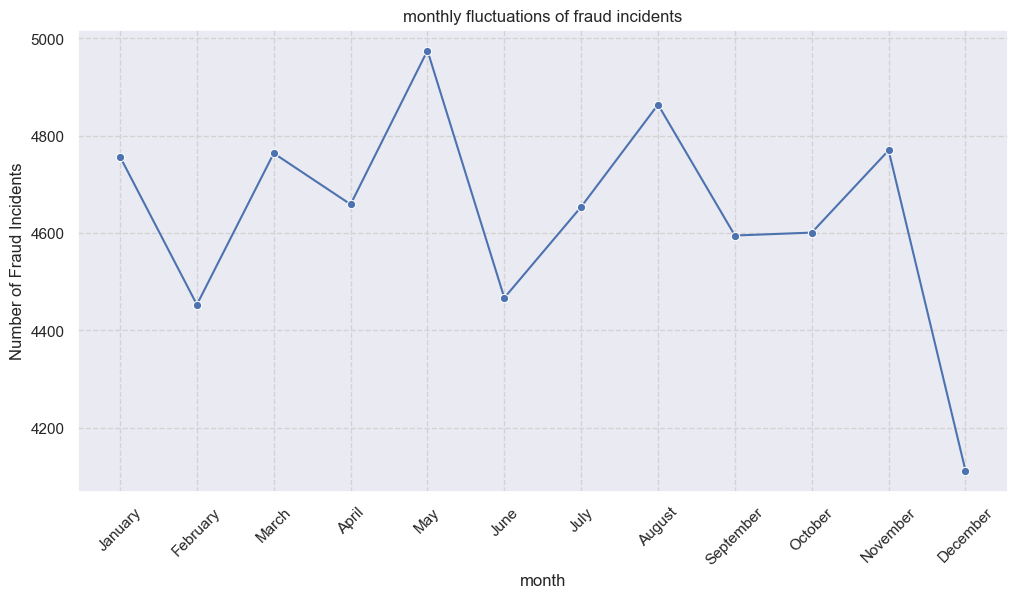

In [20]:
data['dt_txn_comp']=pd.to_datetime(data['dt_txn_comp'])
#Extract montn from'dt_txn_comp" for montly fraud analys
data['month']=data['dt_txn_comp'].dt.month
#group by month and count fraud incidents 
fraud_counts = data.groupby('month').size().reset_index(name='fraud_count')

#set seaborn plot aesthetics 
sns.set(style="darkgrid",color_codes=True,
        rc={"grid.linestyle":"--","grid.color":"lightgray"})
#initialize fiqure with size for clarity
plt.figure(figsize=(12,6))

#create line plot for montly fraud counts 
sns.lineplot(x='month',y='fraud_count',data=fraud_counts,marker='o')

#title and axes labels 
plt.title('monthly fluctuations of fraud incidents')
plt.xlabel('month')
plt.ylabel('Number of Fraud Incidents')

#set x-ticks to month names,rotated for readability
plt.xticks(range(1,13),calendar.month_name[1:13],rotation=45)

#enable grid for readability 
plt.grid(True)

plt.show()
           
           
